# Advanced usage

In this notebook, we show a couple of snippets of code built around the updating modes as provided by the `minibn` module for:
- applying graph algorithms on the state transition graph
- performing random walks
- exporting the state transition graph

In [1]:
from colomoto.minibn import *

Let us first compute the dynamics of a Boolean network with an arbitrary updating mode.

# computing graph layout...


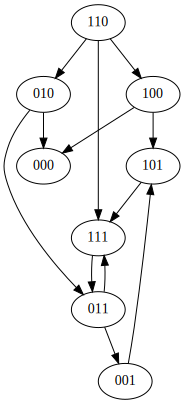

In [2]:
f = BooleanNetwork({
    "x1": "x3 & (!x1 | !x2)",
    "x2": "x1 & x3",
    "x3": "x1 | x2 | x3",
})
dyn = FullyAsynchronousDynamics(f)
g = dyn.dynamics()
g

## Graph algorithms on the transition graph

The object `g` is a [`networkx.DiGraph`](https://networkx.org/documentation/stable/reference/classes/digraph.html) object, for which many algorithms are implemented, see https://networkx.org/documentation/stable/reference/algorithms/index.html.

In [3]:
import networkx as nx

Here, we compute the list of strongly connected components of the dynamics:

In [4]:
list(nx.strongly_connected_components(g))

[{'000'}, {'001', '011', '101', '111'}, {'100'}, {'010'}, {'110'}]

The bottom strongly connected components, i.e., the limit sets of the dynamics, are obtained as follows:

In [5]:
limit_sets = list(nx.attracting_components(g))
limit_sets

[{'000'}, {'001', '011', '101', '111'}]

They can be merged to obtain the set of limit configurations:

In [6]:
from functools import reduce

In [7]:
limit_configurations = reduce(set.union, limit_sets)
limit_configurations

{'000', '001', '011', '101', '111'}

## Random walks

A random walk starts from a configuration and then select of path of a given length by choosing transitions uniformly.
All the updating modes defined in the scope of the `minibn` module provide a `random_walk` method, which can be used as follows:

In [8]:
list(dyn.random_walk({"x1": 1, "x2": 1, "x3": 0}, steps=5))

[{'x1': 1, 'x2': 1, 'x3': 0},
 {'x1': 1, 'x2': 1, 'x3': 1},
 {'x1': 0, 'x2': 1, 'x3': 1},
 {'x1': 1, 'x2': 1, 'x3': 1},
 {'x1': 0, 'x2': 1, 'x3': 1},
 {'x1': 0, 'x2': 0, 'x3': 1}]

## Exporting the transition graph

Using `networkx`, the state transition graph can be exported to various formats, such as DOT. See also https://networkx.org/documentation/stable/reference/readwrite/index.html.

In [9]:
nx.drawing.nx_pydot.write_dot(g, "dyn.dot")

One can also generate custom exports, for instance, for exporting the edges for use in a LaTeX TikZ figure:

In [10]:
def export_edges(g):
    for x,y in g.edges():
        if x == y:
            side = "right" if x[-1] == "1" else "left"
            print(f"\t\\draw[->] (n{x}) edge[loop {side},distance=4mm] (n{y});")
        else:
            print(f"\t\\draw[->] (n{x}) edge (n{y});")

In [11]:
export_edges(g)

	\draw[->] (n100) edge (n000);
	\draw[->] (n100) edge (n101);
	\draw[->] (n101) edge (n111);
	\draw[->] (n110) edge (n010);
	\draw[->] (n110) edge (n100);
	\draw[->] (n110) edge (n111);
	\draw[->] (n010) edge (n000);
	\draw[->] (n010) edge (n011);
	\draw[->] (n111) edge (n011);
	\draw[->] (n011) edge (n111);
	\draw[->] (n011) edge (n001);
	\draw[->] (n001) edge (n101);
